In [61]:
import os 
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import asarray

In [93]:
my_path=os.getcwd()
image_folder='all'
target_path=os.path.join(my_path, image_folder) 

In [94]:
target_path

'c:\\Users\\Lenovo\\Desktop\\Szkolenie\\jdszr6-slytherin_group\\DL project\\all'

In [6]:
tf.keras.preprocessing.image_dataset_from_directory(
    target_path,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=44,
    validation_split=0.3,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    #**kwarags
)

Found 22164 files belonging to 24 classes.
Using 15515 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [95]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    target_path,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=44,
    validation_split=0.3,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    #**kwarags
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    target_path,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=44,
    validation_split=0.3,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    #**kwarags
)

Found 49619 files belonging to 24 classes.
Using 34734 files for training.
Found 49619 files belonging to 24 classes.
Using 14885 files for validation.


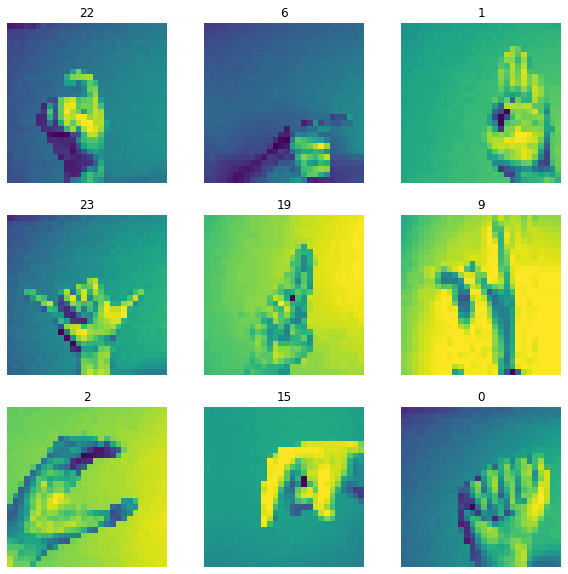

In [96]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i])#.numpy().astypa("unit8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [72]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
datagen.fit(train_ds)

In [97]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(1),
    ]
)

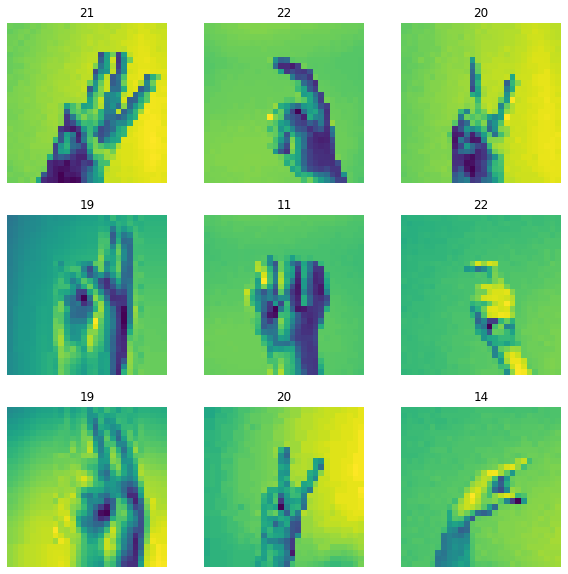

In [98]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [99]:
from PIL import Image
import numpy as np

In [100]:
img_data = np.random.random(size=(28, 28, 1))
img = tf.keras.preprocessing.image.array_to_img(img_data)
array = tf.keras.preprocessing.image.img_to_array(img)

In [101]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [114]:
# Define  & train the model without regularization
model1 = tf.keras.models.Sequential([

  # tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
  # tf.keras.layers.RandomFlip("horizontal"),
  # tf.keras.layers.RandomRotation(0.2),

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(25, activation='softmax')
])

# Print the model summary
model1.summary()

# Use same settings
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING & VALIDATION:')

history1= model1.fit(
  train_ds, epochs=30, validation_data=val_ds
)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 800)               0         
                                                                 
 dense_31 (Dense)            (None, 128)             

In [115]:
model1.save('model_basic_all_photo.h5')

In [105]:
import cv2

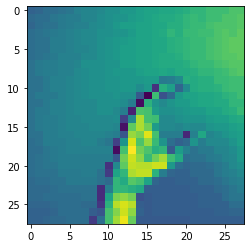

model prediciton: 2


In [117]:
img = cv2.imread("all\C\pic_dm (21).png")
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_res = cv2.resize(img_gray, (28,28))
plt.imshow(img_res)
plt.show()

print('model prediciton:',model1.predict(img_res.reshape(1,28,28,1),verbose=0).argmax())
